In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol for Solana
sol_ticker = yf.Ticker("SOL-USD")
csv_file = "sol.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Solana
sol = sol_ticker.history(period="max")
sol.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
sol = pd.read_csv(csv_file, index_col=0)
sol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0
2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0


<Axes: xlabel='Date'>

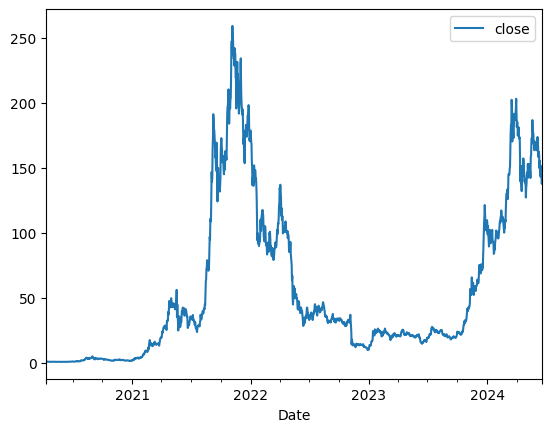

In [3]:
# Convert index to datetime
sol.index = pd.to_datetime(sol.index)

# Remove unnecessary columns
del sol["Dividends"]
del sol["Stock Splits"]

# Convert column names to lowercase
sol.columns = [c.lower() for c in sol.columns]

# Plot the closing price
sol.plot.line(y="close", use_index=True)


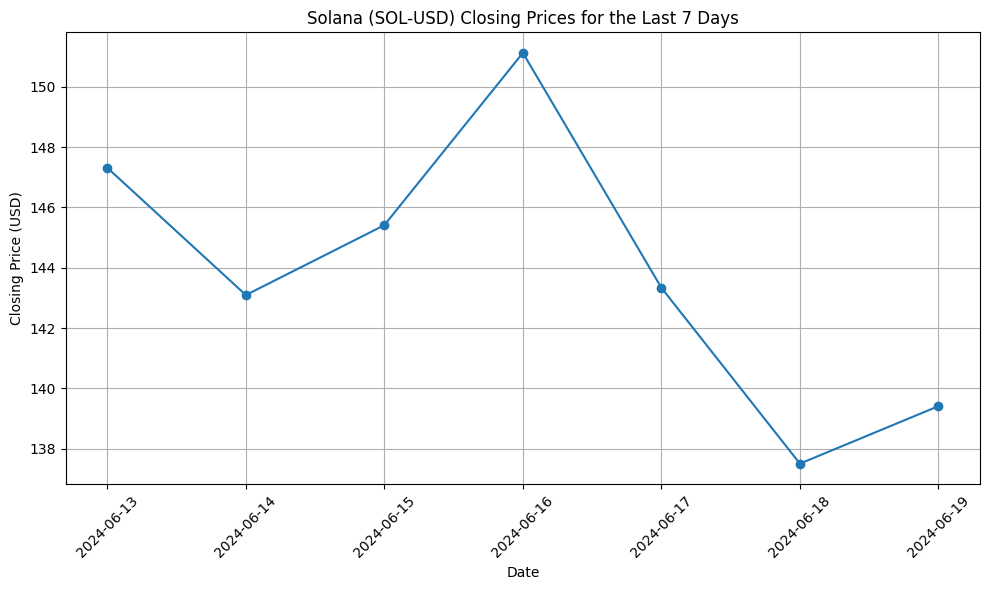

In [4]:
last_seven_days = sol[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days.index, last_seven_days['close'], marker='o')
plt.title('Solana (SOL-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("solana_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.0,0.0,0.0
2009-04-07,0.0,0.0,0.0
2009-04-08,0.0,0.0,0.0
2009-04-09,0.0,0.0,0.0
2009-04-10,0.0,0.0,0.0
...,...,...,...
2024-06-15,0.0,0.0,0.0
2024-06-16,0.0,0.0,0.0
2024-06-17,0.0,0.0,0.0
2024-06-18,0.0,0.0,0.0


In [6]:
# Assuming 'sol' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
sol = sol.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
sol["tomorrow"] = sol["close"].shift(-1)
sol["target"] = (sol["tomorrow"] > sol["close"]).astype(int)
sol["target"].value_counts()


target
0    767
1    765
Name: count, dtype: int64

In [7]:
sol

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0,0.0,0.776819,0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0,0.0,0.882507,1
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0,0.0,0.777832,0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0,0.0,0.661925,0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0,0.0,0.646651,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0,0.0,151.125504,1
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0,0.0,143.334274,0
2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0,0.0,137.503998,0
2024-06-18 00:00:00+00:00,143.314697,143.610657,130.289078,137.503998,4046511952,0.0,0.0,0.0,139.409683,1


In [8]:
sol.to_csv('solSentiment.csv')